# Artificial Neural Network (ANN)

An Artificial Neural Network (ANN) is a machine learning model inspired by the structure and functioning of the human brain. It consists of layers of interconnected neurons (nodes) that process data to make predictions or classifications.

### Why do we use ANNs?

- **Pattern Recognition:** Used in image and speech recognition.

- **Function Approximation:** Used for regression problems.

- **Classification Tasks:** Used in sentiment analysis, spam detection, etc.

### Structure of ANN

ANN consists of three layers:
- **Input Layer:** Receives the input data.

- **Hidden Layers:** Processes data with weights and activation functions.

- **Output Layer:** Produces the final prediction.

### How Does ANN Work?

**Forward Propagation**

- Input values are passed through the network.

- Each neuron applies a weight, bias, and activation function to the input.

- The result is propagated forward to the next layer until the output is produced.

**Backpropagation & Gradient Descent**


To train an ANN, we need to reduce the error (difference between actual and predicted output). This is done using:

**Backpropagation:** Adjusts the weights by computing the gradient of the loss function.

**Gradient Descent:** Optimizes the weights by minimizing the loss.



- **Weights control** the strength of connections between neurons.

- **Biases** help shift the activation function for better learning.

- **Random initialization** prevents symmetry issues in learning.



**Why Backpropagation?**
- Adjusts weights & biases to reduce error.

- Uses Gradient Descent to optimize model.

### Here’s a fully functional neural network that trains using gradient descent.

In [114]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases randomly
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        """ Forward propagation """
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = self.sigmoid(self.z2)
        return self.output

    def backward(self, X, y):
        """ Backpropagation and weight update """
        m = X.shape[0]

        # Compute error
        loss = y - self.output

        # Gradients for output layer
        d_output = loss * self.sigmoid_derivative(self.output)

        # Gradients for hidden layer
        d_hidden_layer = np.dot(d_output, self.W2.T) * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += self.learning_rate * np.dot(self.a1.T, d_output) / m
        self.b2 += self.learning_rate * np.sum(d_output, axis=0, keepdims=True) / m
        self.W1 += self.learning_rate * np.dot(X.T, d_hidden_layer) / m
        self.b1 += self.learning_rate * np.sum(d_hidden_layer, axis=0, keepdims=True) / m

    def train(self, X, y, epochs=1000):
        """ Training loop """
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            
            if epoch % 100 == 0:  # Print loss every 100 epochs
                loss = np.mean(np.square(y - self.output))
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        """ Make predictions """
        return self.forward(X)


### Generate Sample Dataset

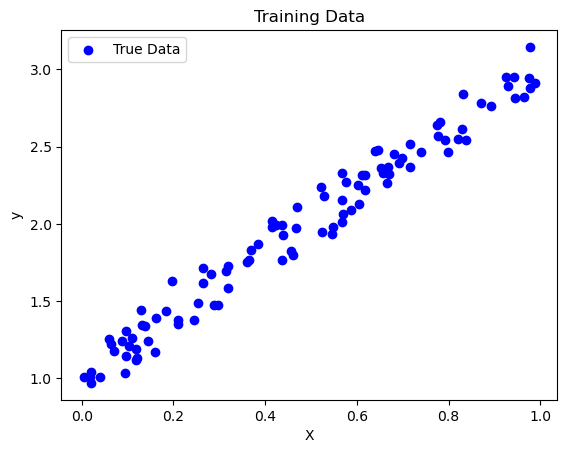

In [121]:
import matplotlib.pyplot as plt

# Generate sample dataset
np.random.seed(0)
X_train = np.random.rand(100, 1)  # 100 samples, 1 feature
y_train = 2 * X_train + 1 + 0.1 * np.random.randn(100, 1)  # y = 2x + 1 + noise

# Plot data
plt.scatter(X_train, y_train, color="blue", label="True Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data")
plt.legend()
plt.show()


### Train the Neural Network

In [125]:
# Initialize the neural network
nn = NeuralNetwork(input_size=1, hidden_size=10, output_size=1, learning_rate=0.1)

# Train the model
nn.train(X_train, y_train, epochs=1000)

Epoch 0, Loss: 1.5215787255003073
Epoch 100, Loss: 1.3145702343175387
Epoch 200, Loss: 1.2940899516052276
Epoch 300, Loss: 1.2865877693112537
Epoch 400, Loss: 1.2827303345573917
Epoch 500, Loss: 1.280391092383328
Epoch 600, Loss: 1.2788253412061423
Epoch 700, Loss: 1.2777058835361685
Epoch 800, Loss: 1.2768667905217597
Epoch 900, Loss: 1.276215090359515


### Test Predictions

In [129]:
# Generate test data
X_test = np.array([[0.1], [0.5], [0.9]])
y_pred = nn.predict(X_test)

print("Predictions:")
for i in range(len(X_test)):
    print(f"Input: {X_test[i][0]}, Predicted Output: {y_pred[i][0]}")

Predictions:
Input: 0.1, Predicted Output: 0.9966547515349921
Input: 0.5, Predicted Output: 0.997565678435911
Input: 0.9, Predicted Output: 0.9979341463078787
